3. 동영상 로드 : cv2.VideoCapture
                 cv2.accumulateWeighted(src, dst, alpha[, mask]) -> dst  # 이미지의 가중 평균값을 구하는 함수
                 cv2.absdiff(src1, src2[, dst]) -> dst
                 cv2.threshold(src, thresh, maxval, type[, dst]) -> retval, dst
                 cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
                 cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
4. 카메라 가져오기
5. 동영상 사이즈, FPS, 프레임 리턴, 설정
6. 영상 녹화(웹카메라)
7. SAD, SSD, NCC

In [ ]:
# 3) cv2.accumulateWeighted(src, dst, alpha[, mask])
# 대상 이미지를 만들어서 가중평균을 원하는 색깔로 요청해보자
import numpy as np
import cv2
import matplotlib.pyplot as plt

accuimg = np.zeros(2, dtype=np.float32)
img = np.empty((0,2))

# mask
mask = np.array([255,0], dtype=np.uint8)

for i in range(20):
    newimg = np.array([255,255], dtype=np.float32)
    cv2.accumulateWeighted(newimg, accuimg, 0.1, mask=mask)
    img = np.append(img, [accuimg], axis=0)
    print(img)
    
plt.plot(img[:,0], label = 'mask : 255', color = 'red')
plt.plot(img[:,1], label = 'mask : 0', color = 'blue')
plt.legend()
plt.show()

# accumulateWeighted()을 실행하게 될 경우 mask데이터에서 지정된 값에 따라 
# 0이 지정된 픽셀은 가중 평균되지 않고 이전값이 저장, 1이 지정된 픽셀은 가중 평균된 값이 업데이트가 된다.

In [ ]:
# 가중치 : 값은 동일하지만 상황에 따라 다르게 적용되는 값
# 가중치를 이용해서 평균값을 구하는 것을 가중평균이라고 한다.

data01,data02,data03 ,,, data n 에 대한 가중치
t1, t2, t3 ,,, tn 이라면 가중치의 합은 t1+t2+t3+tn = t_hap
가중평균 = (data01 * t1) + (data02 * t2) + (data03 * t3) / t_hap

In [ ]:
# 4) 카메라 가져오기
import numpy as np
import cv2

# 동영상 로드
cp = cv2.VideoCapture(0)

while(cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    # 확인
    if ret:
        cv2.imshow("my_frame", frame)
        cv2.waitKey(1)
    else:
        cp.release()
        
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2

filepath = 'myImg\\01_People.avi'
# 동영상 로드
cp = cv2.VideoCapture(filepath)

# 속성값을 확인해보자
width = cp.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cp.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cp.get(cv2.CAP_PROP_FPS)
frame_num = cp.get(cv2.CAP_PROP_FRAME_COUNT)

print(width, height, fps, frame_num)

play_time = frame_num / fps
print("play_time [sec]", play_time)

640.0 480.0 24.0 497.0
play_time [sec] 20.708333333333332


In [3]:
# 5) 비디오 속성값을 변경한 avi를 실행해보자
import numpy as np
import cv2

filepath = 'myImg\\01_People.avi'
# 동영상 로드
cp = cv2.VideoCapture(filepath)

# 속성값을 변경해보자
print(cp.set(cv2.CAP_PROP_FRAME_WIDTH, 50))
print(cp.set(cv2.CAP_PROP_FRAME_HEIGHT, 400))
print(cp.set(cv2.CAP_PROP_FPS,20))

while(cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    # 확인
    if ret:
        cv2.imshow("my_frame", frame)
        cv2.waitKey(1)
    else:
        cp.release()
        
cv2.destroyAllWindows()

False
False
False


In [ ]:
# 6) 비디오 캠을 실행해서 속성값을 실행해보자
import numpy as np
import cv2

cp = cv2.VideoCapture(0)

# 속성값을 변경해보자
print(cp.set(cv2.CAP_PROP_FRAME_WIDTH, 50))
print(cp.set(cv2.CAP_PROP_FRAME_HEIGHT, 400))
print(cp.set(cv2.CAP_PROP_FPS,10))

print(cp.get(cv2.CAP_PROP_FPS))

while(cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    # 확인
    if ret:
        cv2.imshow("my_frame", frame)
        cv2.waitKey(1)
    else:
        cp.release()
        
cv2.destroyAllWindows()

In [ ]:
# 7) 영상 녹화를 해보자
# cv.VideoWriter(	filename, fourcc, fps, frameSize[, isColor]
# VideoWriter_fourcc(c1, c2, c3, c4) -> retval
import numpy as np
import cv2

cp = cv2.VideoCapture(0)
fps = 30
size = (640, 480)

# 동영상 설정 출력 파일
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # ('X', 'V', 'I',' D')의 형태도 가능
video = cv2.VideoWriter('myImg\\output.avi', fourcc, fps, size)


while(cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    
    if ret:
        cv2.imshow("my_frame", frame)
        video.write(frame)
        if cv2.waitKey(1) == ord('q'):
            break
        
cp.release()

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This program shows how to use background subtraction methods provided by \
                                              OpenCV. You can process both videos and images.')

parser.add_argument('--input', type=str, help='Path to a video or a sequence of image.', default='myImg\\output.avi')
parser.add_argument('--algo', type=str, help='Background subtraction method (KNN, MOG2).', default='MOG2')
args = parser.parse_args()

if args.algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()
    
capture = cv.VideoCapture(cv.samples.findFileOrKeep(args.input))

if not capture.isOpened():
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
        
    fgMask = backSub.apply(frame)
    cv.rectangle(frame, (10, 2), (100, 20), (255, 255, 255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

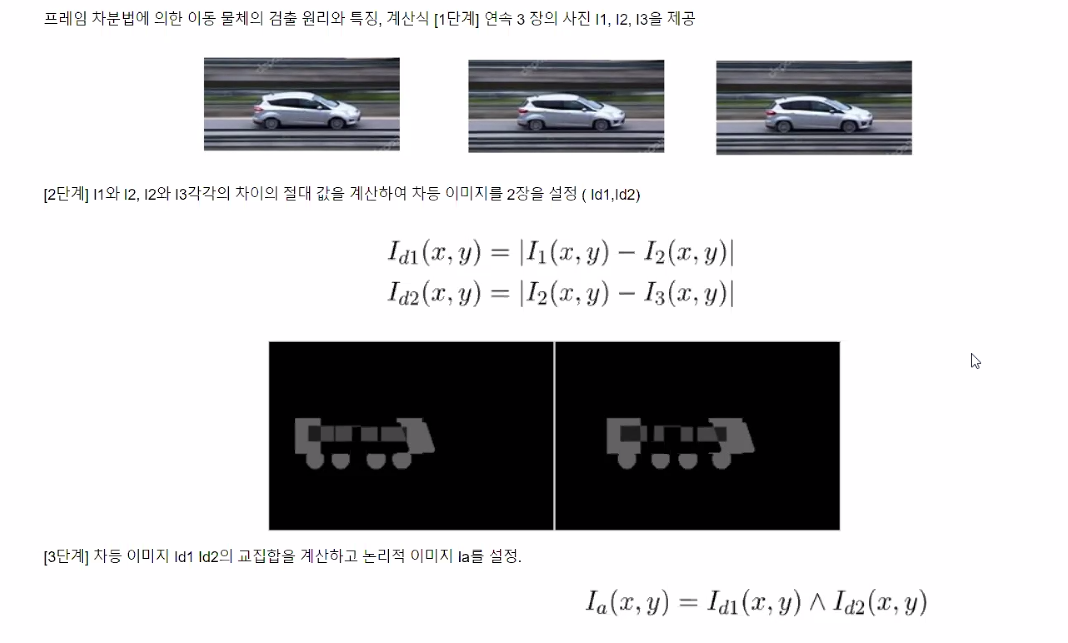

In [ ]:
# 8) 차분법을 이용한 배경과 이미지를 분리해서 탐색
import cv2
import numpy as np
import time

i = 0    # 카운트 변수
th = 30   # 차분 이미지의 한계

cap = cv2.VideoCapture('myImg\\output.avi')   # 동영상 파일 캡처

ret, bg = cap.read()   # 첫 번째 프레임을 배경 이미지로 설정

# 그레이 스케일 변환
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)

while (cap.isOpened()):
    # 프레임의 취득
    ret, frame = cap.read()
    
    # 그레이 스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 차이의 절대값을 계산
    mask = cv2.absdiff(gray, bg)
    
    # 차등 이미지를 두 값의 마스크 이미지를 산출
    mask [mask < th] = 0
    mask [mask >= th] = 255
    
    # 프레임과 마스크 이미지로 보기
    cv2.imshow('mask', mask)
    cv2.imshow('Flame', gray)
    cv2.imshow('Background', bg)
    
    # 대기(0.03sec)
    time.sleep(0.03)
    i += 1   # 카운트를 1 증가
    
    # 배경 이미지 업데이트(간격)
    if (i>30):
        ret, bg = cap.read()
        bg = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
        i - 0   # 카운트 변수의 초기화
        
    if cv2.waitKey(1) & 0xFF == ord('q'):   # q 키를 누를 때 도중에 종료
            break
        
cap.release()
cv2.destroyAllWindows()

In [2]:
# 9) 감시카메라등에서 움직이는 물체를 악성 물질이라 탐지하고 사진으로 찍어서 저장해보자
import cv2
import numpy as np
import time

# 1. 차분법을 이용한 함수로 생성 MyFrame_sub(frame1, frame2, frame3)
def MyFrame_sub(frame1, frame2, frame3, th):
    # 1-1 프레임의 절대 차이 값 지정
    diff01 = cv2.absdiff(frame1, frame2)
    diff02 = cv2.absdiff(frame2, frame3)
    
    # 1-2 차분 이미지 교집합
    diff_res = cv2.bitwise_and(diff01, diff02)
    
    # 차등 이미지를 두 값의 마스크 이미지를 산출
    diff_res [diff_res < th] = 0
    diff_res [diff_res >= th] = 255
    
    # 블러링 작업
    mask = cv2.medianBlur(diff_res, 5)
    return diff_res
    
# 2. 움직이는 악성물질을 판정하는 판정값
fw = 1000

# 3. 카메라 연결
# cap = cv2.VideoCapture('myImg\\01_People.avi')   # 동영상 파일 캡처
cap = cv2.VideoCapture(0)

# 4. 프레임 세개를 지정한 후 흑백으로 변경
f1 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
f2 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
f3 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)

cnt = 0  # 반복문안에 파일이름으로 카운트,, frame0.jpg, frame1.jpg

while cap.isOpened():
# 5. 영상을 읽어서 MyFrame(frame1, frame2, frame3)으로 차분을 한다
    mask = MyFrame_sub(f1, f2, f3, th=50)
    
# 6. 5번의 결과로 얻은 이미지 하얀색만 픽셀수를 추출  cv2.countNonZero()
    res = cv2.countNonZero(mask)
    
# 7. 6번의 결과값 res가 2번보다 크면 악성물질로 판정 후 이미지 저장
    if res > fw:
        print("악성물질일 가능성이 있다 :",cnt)
        filename = 'c:\\MyTest\\frame'+str(cnt)+'.jpg'
        cv2.imwrite(filename, f2)
        cnt += 1

# 8. 프레임의 결과를 확인
    cv2.imshow('frame2', f2)
    cv2.imshow('mask', mask)
    
# 9. 배경 이미지 업데이트
    f1 = f2
    f2 = f3
    f3 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):   # q 키를 누를 때 도중에 종료
            break
            
cap.release()
cv2.destroyAllWindows()

악성물질일 가능성이 있다 : 0
악성물질일 가능성이 있다 : 1
악성물질일 가능성이 있다 : 2
악성물질일 가능성이 있다 : 3
악성물질일 가능성이 있다 : 4
악성물질일 가능성이 있다 : 5


영상(동적인 이미지)인 상황에서 이동물체 감지_ 컬러추적
 - HSV 색공간을 활용한다.
 - ex) 빨강의 범위를 살펴보자
     - 일반적인 빨강의 범위 H : 0~60, 300~360도, S : 50~100%, V : 0~100%
     - openCV 빨강의 범위 H : 0~30, 150~179도, S : 128~255%, V : 0~255%
 - ex) 파랑의 범위를 살펴보자
 
 - ex) 초록의 범위를 살펴보자

In [9]:
# 10) HSV 형식의 컬러를 이용해서 물체 감지를 해보자
import numpy as np
import cv2

# 1. 사용자 함수를 생성한 다음 넘겨받은 이미지를 HSV컬러 공간을 만들자 [빨강]
def myColor(img):
    # 1-1. img의 색공간을 HSV로 변경
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # 1-2 HSV 영역에서 빨강색 공간 치역 1
    hsv_min = np.array([0, 127, 0])
    hsv_max = np.array([30, 255, 255])
    mask1 = cv2.inRange(hsv_img, hsv_min, hsv_max)
    
    # 1-3 HSV 영역에서 빨강색 공간 치역 2
    hsv_min = np.array([150, 127, 0])
    hsv_max = np.array([179, 255, 255])
    mask2 = cv2.inRange(hsv_img, hsv_min, hsv_max)
    
    return (mask1 + mask2)

# 2. 카메라 캡처
# filepath = 'myImg\\01_People.avi'
# cp = cv2.VideoCapture(filepath)
cp = cv2.VideoCapture(0)

while(cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    
# 3. 데이터 읽어서 1번의 함수를 통해 값을 변환 [빨강영역 추출]
    mask_res = myColor(frame)

# 4. 결과 보기
    cv2.imshow('MyFrame', frame)
    cv2.imshow('mask', mask_res)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):   # q 키를 누를 때 도중에 종료
        break

cp.release()
cv2.destroyAllWindows()

In [25]:
# 11) HSV 형식의 컬러를 이용해서 물체 감지를 해보자. 
# 움직이는 대상의 원하는 위치에 동그라미를 그려서 위치를 csv파일로 저장해보자
# cv2.connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]) -> retval, labels, stats, centroids
import numpy as np
import cv2
import time

# 1. 사용자 함수를 생성한 다음 넘겨받은 이미지를 HSV컬러 공간을 만들자 [빨강]
def myColor(img):
    # 1-1. img의 색공간을 HSV로 변경
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # 1-2 HSV 영역에서 빨강색 공간 치역 1
    hsv_min = np.array([0, 127, 0])
    hsv_max = np.array([30, 255, 255])
    mask1 = cv2.inRange(hsv_img, hsv_min, hsv_max)
    
    # 1-3 HSV 영역에서 빨강색 공간 치역 2
    hsv_min = np.array([150, 127, 0])
    hsv_max = np.array([179, 255, 255])
    mask2 = cv2.inRange(hsv_img, hsv_min, hsv_max)
#     return mask1 + mask2
    
    # 1-4 지정된 마스크 구현 cv2.dilate(), cv2.erode()
    mask = mask1 + mask2
    kernel = np.ones((6,6), np.uint8)
    mask = cv2.dilate(mask, kernel)   # 외곽의 1
    mask = cv2.erode(mask,kernel)   # 외곽의 0
    return mask

# 추가 함수 cv2.connectedComponentsWithStats
def my_calc(mask):
    if np.count_nonzero(mask) <= 0:
        return (-20, -20)
    
    label = cv2.connectedComponentsWithStats(mask)
    n = label[0] - 1
    data = np.delete(label[2], 0, 0)
    center = np.delete(label[3], 0, 0)
    max_index = np.argmax(data[:, 4])
    return center[max_index]

# 2. 카메라 캡처
filepath = 'myImg\\01_People.avi'
# cp = cv2.VideoCapture(filepath)
cp = cv2.VideoCapture(0)
data = []
start = time.time()

while(cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    
# 3. 데이터 읽어서 1번의 함수를 통해 값을 변환 [빨강영역 추출]
    mask_res = myColor(frame)
    x,y = my_calc(mask_res)
    data.append([time.time()-start, x, y])
    
    # 3-1. 동그라미를 그리자
    cv2.circle(frame, (int(x), int(y)), 20, (0,0,255), 10)

# 4. 결과 보기
    cv2.imshow('MyFrame', frame)
    cv2.imshow('mask', mask_res)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):   # q 키를 누를 때 도중에 종료
        break
        
# 5. 파일 저장
    np.savetxt('c:\\MyTest\\data.csv', np.array(data), delimiter = ',')

cp.release()
cv2.destroyAllWindows()

In [26]:
import numpy as np
import cv2
import time
# ex12) Hsv형식의 컬러를 이용해서 물체 감지를 해보자 .움직이는 대상에 원하는 위치에 동그라미를 그려서
# 위치를 csv에 파일 저장해보자
# connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]) -> retval, labels, stat
#          s, centroids
# 1. 사용자 함수를 생성한다음  넘겨받은 이미지를  hvs컬러 공간을 만들자.  [빨강]
def myColor(img):
    # 1-1 . img의 색공간을  hsv로 변경
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # 1-2 .HSV 영역에서 빨강색 공간 치역  1
    hsv_min = np.array([0, 127, 0])
    hsv_max = np.array([30, 255, 255])
    mask1 = cv2.inRange(hsv_img, hsv_min, hsv_max)
# 1-3 .HSV 영역에서 빨강색 공간 치역  2
    hsv_min = np.array([150, 127, 0])
    hsv_max = np.array([179, 255, 255])
    mask2 = cv2.inRange(hsv_img, hsv_min, hsv_max)
#    return mask1 + mask2
# 1-4. 지정된 마스크 구현   cv2.dilate()  , cv2.erode()
    mask=mask1+ mask2
    kernel = np.ones((6,6),np.uint8)
    mask = cv2.dilate(mask,kernel)
    mask = cv2.erode(mask,kernel)
    return mask
# 추가 함수    connectedComponentsWithStats(i
def my_calc(mask):
    if np.count_nonzero(mask) <= 0:
        return (-20, -20)
    lable = cv2.connectedComponentsWithStats(mask)
    n = lable[0] - 1
    data = np.delete(lable[2], 0, 0)
    center = np.delete(lable[3], 0, 0)
    max_index = np.argmax(data[:,4])
    return center[max_index]
# 2. 카메라 캡처
filepath = "c:\\myImg\\01_People.avi"
# 동영상 로드
cp = cv2.VideoCapture(0)
data = []
start = time.time()
while (cp.isOpened()):
    # 프레임으로 리턴
    ret, frame = cp.read()
    # 3. 데이터 읽어서 1번의 함수를 통해 값을 변환 [빨강영역 추출]
    mask_res = myColor(frame)
    x, y = my_calc(mask_res)
    data.append([time.time() - start, x, y])
    # 3-1 동그라미그리자
    cv2.circle(frame, (int(x), int(y)), 20, (0, 0, 255), 10)
    # 4. 결과 보기
    cv2.imshow("MyFrame", frame)
    cv2.imshow("mask", mask_res)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # q 키를 누를 때 도중에 종료
        break
    # 5. 파일저장
    np.savetxt("c:\\mytest\\data.csv", np.array(data), delimiter=",")
cp.release()
cv2.destroyAllWindows()